# How to compute equivalent widths

The equivalent width (EW) of a line is a useful characteristic for describing the strength of a spectral feature. EWs have specific use-cases in the study of different objects; for example, [the EW of the Balmer alpha transition in T Tauri stars is used to classify them as being classical or weak-lined](https://onlinelibrary.wiley.com/doi/book/10.1002/9783527618675).

The equivalent width is essentially the area inside the line, between the line and the continuum. The EW is defined as:

$$EW = \int \frac{F_c - F(\lambda)}{F_c} d\lambda,$$

where $F_c$ is the continuum level, $F(\lambda)$ is the observed line profile, and $\lambda$ wavelength. For real observations with discrete pixels, this equation is usually discretized using numerical integration like:

$$EW = \sum \frac{F_c - F_\lambda}{F_c} \Delta\lambda,$$

with a pixel spacing $\Delta\lambda$.  The EW and it's uncertainty are typically reported in units of wavelength, although units of velocity can also be used, by dividing by the rest wavelength of the line and multiplying by the speed of light.  

For this tutorial, we will use an observation of the T Tauri star BP T Tauri from ESPaDOnS, with an UPENA normalized spectrum ([IndividualLine_tutorialfiles/1423137pn.s](https://github.com/folsomcp/specpolFlow/blob/main/docs-jb/Tutorials/IndividualLine_tutorialfiles/1423137pn.s)).  First we import SpecpolFlow and any other packages.

In [1]:
import specpolFlow as pol
import matplotlib.pyplot as plt


## Using the Spectrum class calc_ew()

The simplest way to make an equivalent width calculation for a line in an observation is to use the [`calc_ew`](Spectrum.calc_ew) function of the [`Spectrum`](Spectrum) class.  First we read in the observed spectrum with [`read_spectrum`](read_spectrum).  We then use the `Spectrum` [`merge_orders`](Spectrum.merge_orders) function, to remove overlapping spectral orders, which can throw off the EW calculation.  Then we run the [`calc_ew`](Spectrum.calc_ew) function from that spectrum.  We define `lineRange`, as the wavelength range integrated across to calculated the EW.  We also define `contRange` with a set of wavelength ranges that are used as continuum regions.  `contRange` can be a List containing multiple lists, each with two entries: a start and end wavelength for a continuum region.  The final continuum level is take as the median of pixels in the continuum regions.

Here we set `verbose=True` to print out some information about the continuum level.  

using AUTO method for the normalization
  using the median of the continuum outside of the line: 0.98812
The equivalent width of this line is 0.0376 +/- 0.0002 nm.


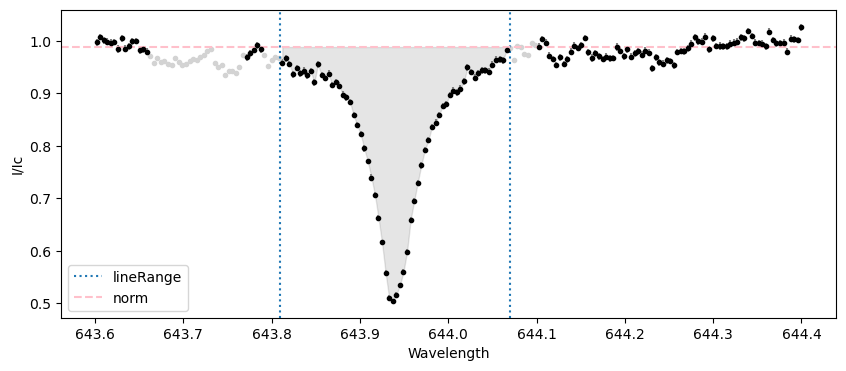

In [2]:
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")
spec = spec.merge_orders(mode='trim')  # remove spectral order overlap
equivWidth, equivWidthErr, figure = spec.calc_ew(lineRange=[643.81, 644.07],
                                                 contRange=[[643.60, 643.66],[643.77, 643.79],[644.1, 644.4]],
                                                 verbose=True)

print("The equivalent width of this line is {:.4f} +/- {:.4f} nm.".format(equivWidth, equivWidthErr))
plt.show()

By default this function generates a diagnostic plot.  The region used for the EW calculation is shaded, inside vertical lines. Regions used to estimate the continuum level are shown as outside the vertical lines as black points, and the continuum level is shown as a horizontal line.  Pixels not used in the calculation are shown as grey points.  If you don't need the diagnostic plot (e.g. you are processing several observations) you can use `plot=False`.  

In [3]:
equivWidth, equivWidthErr = spec.calc_ew(lineRange=[643.81, 644.07],
                                         contRange=[[643.60, 643.66],[643.77, 643.79],[644.1, 644.4]],
                                         verbose=False, plot=False)
print("The equivalent width of this line is {:.4f} +/- {:.4f} Å.".format(10*equivWidth, 10*equivWidthErr))

The equivalent width of this line is 0.3759 +/- 0.0019 Å.


The equivalent width calculation can also be applied to emission lines.  This will produce a negative value, since this line is in emission; lines in absorption will be positive.  Using positive values of EW for absorption lines and negative values of EW for emission lines is a convention we adopt here.  But in other places positive values may be used for EWs of emission lines.

using AUTO method for the normalization
  using the median of the continuum outside of the line: 1.05655
The equivalent width of this line is -7.459 +/- 0.002 nm.


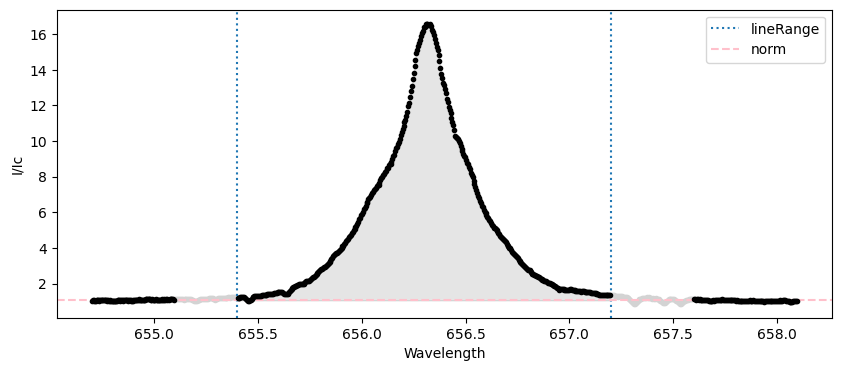

In [4]:
equivWidth, equivWidthErr, figure = spec.calc_ew(lineRange=[655.4, 657.2],
                                                 contRange=[[654.7, 655.1],[657.6, 658.1]],
                                                 verbose=True)

print("The equivalent width of this line is {:.3f} +/- {:.3f} nm.".format(equivWidth, equivWidthErr))
plt.show()

Part of the traditional definition of a Classical T Tauri star (as opposed to a weak-line T Tauri star) is that the equivalent width of H $\alpha$ is greater than 10 Å (> 1 nm, or in this script < -1 nm). As we can see above, BP Tau seems like a Classical T Tauri star! For more information on BP Tau, check out [this paper](https://academic.oup.com/mnras/article/386/3/1234/1057083).

If you already know the continuum level, you can specify that with the `norm` parameter.  If `norm` is set to a number, then `contRange` is not used.  In this example we just fix the continuum to 1.0

In [5]:
equivWidth, equivWidthErr = spec.calc_ew(lineRange=[655.4, 657.2],
                                         norm=1.0, plot=False)
print("The equivalent width of this line is {:.3f} +/- {:.3f} nm.".format(equivWidth, equivWidthErr))

The equivalent width of this line is -7.561 +/- 0.002 nm.


## Using the LSD class calc_ew()

The [`LSD`](LSD) class also has a [`calc_ew`](LSD.calc_ew) function, which provides some alternative input parameters, and has input parameters very similar to the calc_bz function.  This can be used to calculate EW values for LSD profiles.  It can also be used to calculate individual lines in a real spectrum by using the [`Spectrum.individual_line`](Spectrum.individual_line) function, to get one line from a [`Spectrum`](Spectrum) and convert it to an [`LSD`](LSD) object.

Below, we calculate the EW for the H $\alpha$ line for our test star, BP T Tauri. We start be loading in the UPENA normalized spectrum and extracting the line in question.

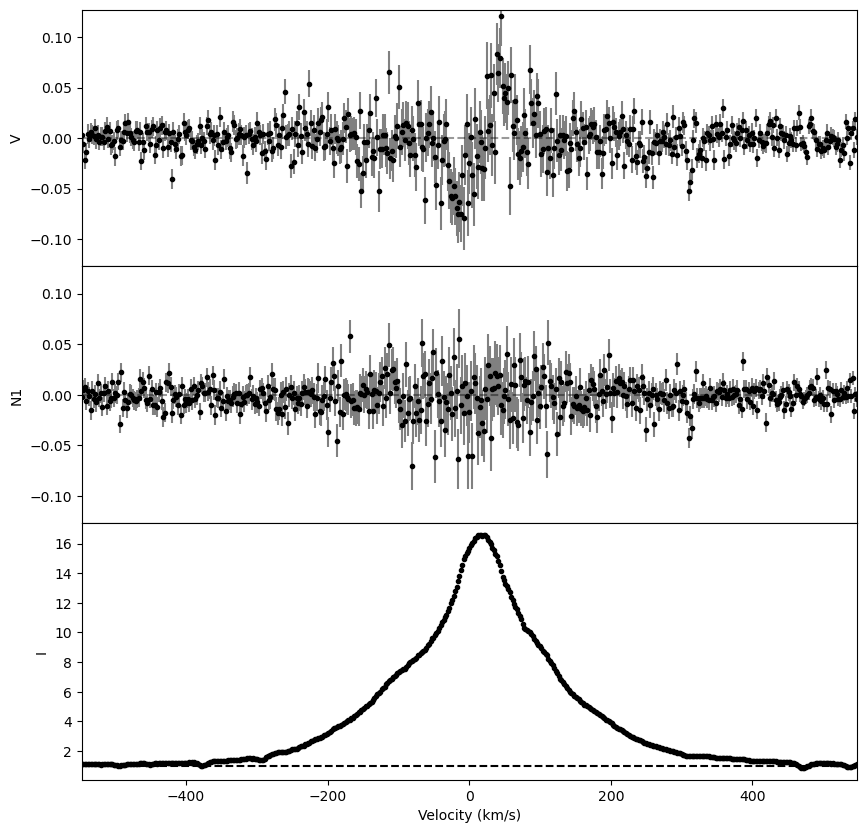

In [6]:
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")
# Make sure to remove order overlap before calculating EWs!
spec = spec.merge_orders(mode='trim')
# creating a line profile from just the Halpha line
prof_Halpha = spec.individual_line(lambda0 = 656.28, lwidth = 1.2)

fig, axes = prof_Halpha.plot()
axes[-1].axhline(1.0, color ='k', ls = '--') # add an extra line showing the continuum
plt.show()

[`calc_ew`](LSD.calc_ew) uses the above LSD object and the following parameters:
- `cog` - value or calculation method for the center of gravity; if not specified, will default to the cog of the Stokes I profile.  This is only used for calculating the integration range, since ewwidth is relative to this value (for consistency with calc_bz).
- `norm` - calculation method for the continuum; the default here is `auto`, which uses the median of pixels outside `velrange`, but you can set it to a specific value but just setting it to that number.
- `lambda0` -  the wavelength of the line center - this should be the same `lambda0` used to generate `prof`.  This is only used for converting the EW from km/s to wavelength units.
- `velrange` - the range of velocity used for the determination of the line center (pixels inside this range) and the continuum (pixels outside this range); if none is given, this will default to the full range.
- `ewwidth` - the distance from the line center for the EW calculation; if one value is given, the range will be +/- this value from the center of the line, if two values are given, these will be the bounds of the integral. If no value is given, this will default to the `velrange`. Since we are working from the LSD object, our `ewwidth` is in velocity units (km/s).
- `fullOutput` - bool; if `True` (default), the output will return the EW _and_ its error.
- `plot` - bool; if `True` (default), the output will return a matplotlib figure. 

Below, we are specifying the `lambda0` in nanometers so that the EW is returned in nanometers, if you specify `lambda0` in Ångstroms the EW will be in Ångstrom, if  `lambda0` is not specified, the EW will be in km/s.  `norm` is set to specify the continuum at 1.0, `ewwidth` gives the velocity range for integration, and setting `velrange` to `None` means it defaults to the full LSD object above (which is ok since norm is a specified value, and velrange is only used for the cog estimate). 

The equivalent width of this line is -7.55 +/- 0.00 nm.


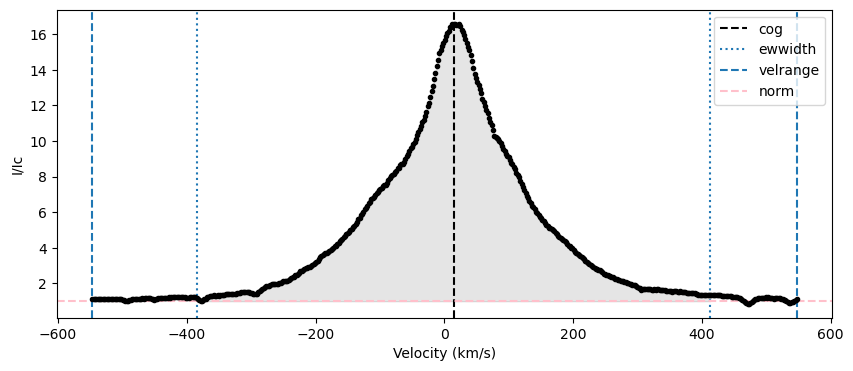

In [7]:
equivWidth, equivWidthErr, figure = prof_Halpha.calc_ew(lambda0=656.28, norm=1.0, velrange=None, ewwidth=400.0)

print("The equivalent width of this line is {:.2f} +/- {:.2f} nm.".format(equivWidth, equivWidthErr))
plt.show()

Here again, this value is negative since this line is in emission. 

As a second example, we leave the EW in km/s, and we do not specify the continuum level, but instead set velrange, and let the continuum be estimated from the median of points outside velrange.

In [8]:
equivWidth, equivWidthErr = prof_Halpha.calc_ew(velrange=[-500.0,500.0], ewwidth=400.0, plot=False)
print("The equivalent width of this line is {:.1f} +/- {:.1f} km/s.".format(equivWidth, equivWidthErr))

The equivalent width of this line is -3352.6 +/- 0.7 km/s.


## Violet to Red ratio calculation

Another useful quality is the _V/R_ or _Violet over Red_ ratio. This is the ratio of the equivalent width of the violet side of the line (shorter wavelength) to the red side of the line (longer wavelength). This can be calculated with the [`calc_V_R`](LSD.calc_V_R) function, which is similar to using [`calc_ew`](LSD.calc_ew).  

This function is sensitive to the choice of the center-of-gravity of the line.  This can be estimated automatically from the line in Stokes I using `cog='I'`, although this is only reliable for well behaved lines.  Alternatively, this can be set using a radial velocity measured from other lines, which is what we use for this example with an emission line.  Here we use the He I 5875 Å line, which is in emission for BP Tau, which is asymmetric and redshifted from accretion.

using AUTO method for the normalization
  using the median of the continuum outside of the line: 1.0076
The V/R of this line is 0.600 +/- 0.004.


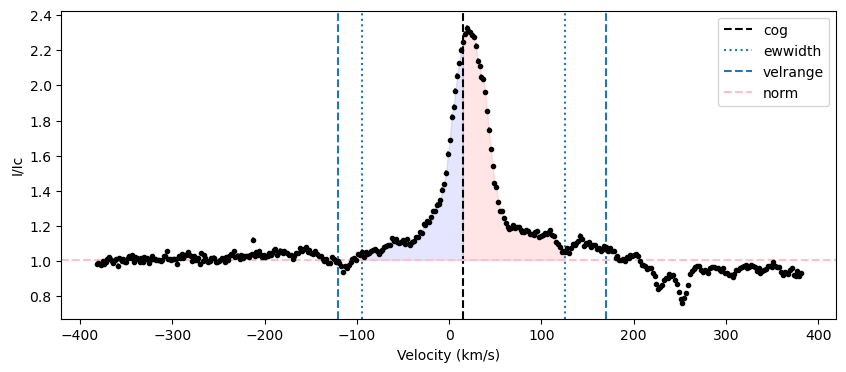

In [9]:
profHe587 = spec.individual_line(lambda0 = 587.56, lwidth = 0.75)
rv = 15.5 # literature radial velocity in km/s 
V_R, V_R_err, figure = profHe587.calc_V_R(ewwidth=110.0, cog=rv, norm = 'auto', velrange=[-120.0, 170.0], verbose=True)

print("The V/R of this line is {:.3f} +/- {:.3f}.".format(V_R, V_R_err))
plt.show()

This metric is useful for checking the asymmetry of a line; for another tool that quantifies asymmetry, check out our [Line Bisector](https://folsomcp.github.io/specpolFlow/Tutorials/8-CalculateBisector_Tutorial.html) tutorial!